<h1>Análisis de datos de Demografía y Población</h1>

In [46]:
import pandas as pd
import numpy as np

In [47]:
data = pd.read_csv('Datos\DemografiaYPoblacion.csv', delimiter=';', decimal=',')

C:\Users\camil\AppData\Local\Temp\ipykernel_7612\3507951759.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Datos\DemografiaYPoblacion.csv', delimiter=';', decimal=',')


In [48]:
data.shape

(897998, 13)

In [49]:
data.describe()

,Código Departamento,Código Entidad,Dato Cualitativo,Año,Mes
count,897997.000000,897997.000000,0.0,897997.000000,897997.000000
mean,37.644918,38063.315163,NaN,2020.187781,11.549461
std,26.003483,25975.861971,NaN,2.077499,2.089799
min,1.000000,1001.000000,NaN,2010.000000,1.000000
25%,15.000000,15667.000000,NaN,2019.000000,12.000000
50%,25.000000,25805.000000,NaN,2020.000000,12.000000
75%,66.000000,66000.000000,NaN,2022.000000,12.000000
max,99.000000,99773.000000,NaN,2023.000000,12.000000


In [50]:
data.head()

,Código Departamento,Departamento,Código Entidad,Entidad,Dimensión,Subcategoría,Indicador,Dato Numérico,Dato Cualitativo,Año,Mes,Fuente,Unidad de Medida
0,NaN,NaN,NaN,NaN,NaN,NaN,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,NaN,NaN,NaN,NaN,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,NaN
1,68.0,Santander,68000.0,Santander,Demografía y población,Población de hombres,Población de hombres de 00-04,"80.892,00",NaN,2018.0,12.0,DANE - Censo Nacional de Población y Vivienda,Hombres
2,68.0,Santander,68001.0,Bucaramanga,Demografía y población,Población de hombres,Población de hombres de 00-04,"18.873,00",NaN,2018.0,12.0,DANE - Censo Nacional de Población y Vivienda,Hombres
3,68.0,Santander,68013.0,Aguada,Demografía y población,Población de hombres,Población de hombres de 00-04,"57,00",NaN,2018.0,12.0,DANE - Censo Nacional de Población y Vivienda,Hombres
4,68.0,Santander,68020.0,Albania,Demografía y población,Población de hombres,Población de hombres de 00-04,"140,00",NaN,2018.0,12.0,DANE - Censo Nacional de Población y Vivienda,Hombres


In [51]:
data.dtypes

Código Departamento    float64
Departamento            object
Código Entidad         float64
Entidad                 object
Dimensión               object
Subcategoría            object
Indicador               object
Dato Numérico           object
Dato Cualitativo       float64
Año                    float64
Mes                    float64
Fuente                  object
Unidad de Medida        object
dtype: object

In [52]:
data.isnull().mean()

Código Departamento    0.000001
Departamento           0.000001
Código Entidad         0.000001
Entidad                0.000001
Dimensión              0.000001
Subcategoría           0.000001
Indicador              0.000000
Dato Numérico          0.084083
Dato Cualitativo       1.000000
Año                    0.000001
Mes                    0.000001
Fuente                 0.000000
Unidad de Medida       0.000001
dtype: float64

In [53]:
data.isnull().mean().sum()

1.0840926149056012

In [54]:
data = data.drop(data.index[0])

In [55]:
data = data.drop('Dato Cualitativo', axis=1)

In [56]:
data.isnull().mean()

Código Departamento    0.000000
Departamento           0.000000
Código Entidad         0.000000
Entidad                0.000000
Dimensión              0.000000
Subcategoría           0.000000
Indicador              0.000000
Dato Numérico          0.084082
Año                    0.000000
Mes                    0.000000
Fuente                 0.000000
Unidad de Medida       0.000000
dtype: float64

In [57]:
data = data.dropna(how='any', axis=0)

In [58]:
data['Dato Numérico'] = data['Dato Numérico'].str.replace('.','')

C:\Users\camil\AppData\Local\Temp\ipykernel_7612\3510602877.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dato Numérico'] = data['Dato Numérico'].str.replace('.','')


In [59]:
data['Dato Numérico'] = data['Dato Numérico'].str.replace(',','.')

In [60]:
data['Dato Numérico'] = data['Dato Numérico'].astype('float')

In [61]:
data.isnull().mean()

Código Departamento    0.000000
Departamento           0.000000
Código Entidad         0.000000
Entidad                0.000000
Dimensión              0.000000
Subcategoría           0.000000
Indicador              0.000000
Dato Numérico          0.239039
Año                    0.000000
Mes                    0.000000
Fuente                 0.000000
Unidad de Medida       0.000000
dtype: float64

In [62]:
data.shape

(822492, 12)

In [63]:
data.dtypes

Código Departamento    float64
Departamento            object
Código Entidad         float64
Entidad                 object
Dimensión               object
Subcategoría            object
Indicador               object
Dato Numérico          float64
Año                    float64
Mes                    float64
Fuente                  object
Unidad de Medida        object
dtype: object

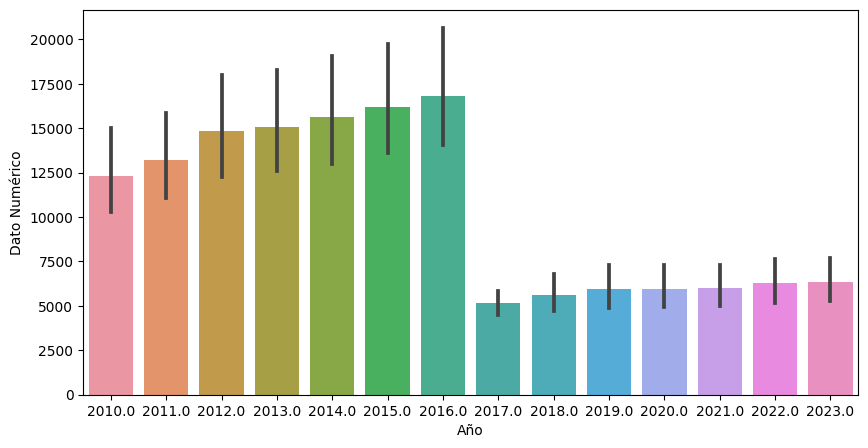

In [64]:
# plot bar data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='Año', y='Dato Numérico', data=data)
plt.show()

In [65]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np
  
# apply normalization techniques
column = 'Dato Numérico'
data[column] = MinMaxScaler().fit_transform(np.array(data[column]).reshape(-1,1))
  

In [67]:
data.to_csv('Datos/DemografiaYPoblacion_limpio.csv', index=False, decimal='.', sep=';')